# Part I - Alphids
1. We wish to solve the differential equation $\frac{dy}{dt}=-\gamma y$ with initial condition $y(0)=10$. We make the Ansatz $y(t) = Ce^{ax}$. Differentiating and plugging in gives $a=-0.1$. $y(0)=C \Rightarrow C=10$. So the analytic solution is $y(t)=10e^{-0.1t}$. It is obviously not a perfect model since it gives continous values for a discrete count of bugs, but atleast it does not explode to infinity, instead it is simply monotonically decreasing which makes sense as there is no food :(


Text(0.5, 1.0, 'Evolution of aphids in the absence of tomatoes')

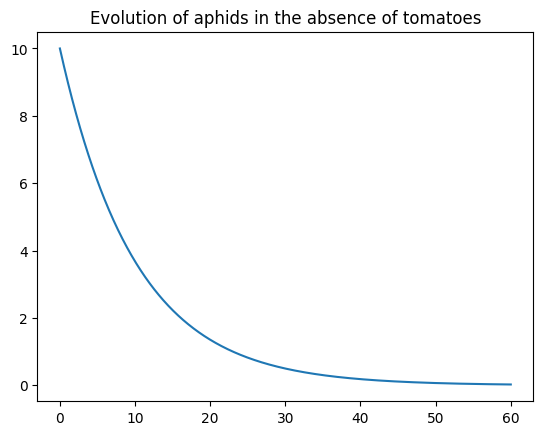

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,60,1000)
y = 10*np.exp(-0.1*x)
plt.plot(x,y)
plt.title("Evolution of aphids in the absence of tomatoes")

3. The linear stability region is given by the interval $[-2,0]$. If the product of the step size and the coefficient in front of the $y$-term lies outside of this interval the Euler forward equation will not be numerically stable. We therefore want $-0.1h \in [-2,0] \Leftrightarrow h \in [0,20]$

Text(0.5, 1.0, 'Euler forward solution')

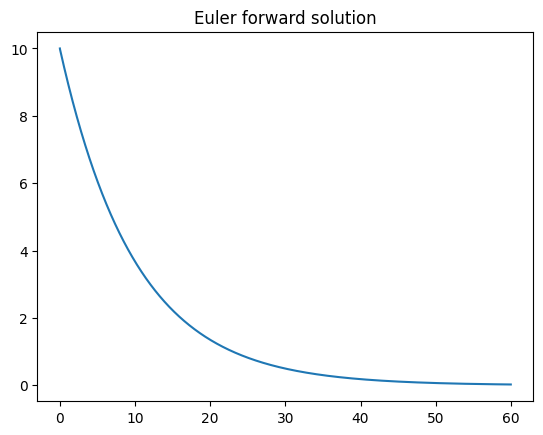

In [2]:
import math
def euler_forward(f,h,tmax, y0):
    y_vals = [y0]
    x_vals = [0]
    n_steps = math.floor(tmax/h)
    for i in range(0,n_steps):
        y_vals.append(y_vals[i] + h*f(y_vals[i]))
        x_vals.append(h*i)
    return x_vals, y_vals
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 0.01, 60, 10)
plt.plot(x_vals,y_vals)
plt.title("Euler forward solution")

We will now see what happens when we set the step size to $22$, which is $10\%$ larger than the theoretical maximum

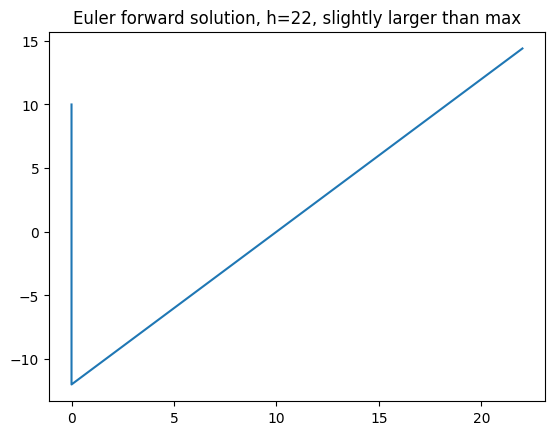

Text(0.5, 1.0, 'Euler forward solution, h=18, slightly smaller than max')

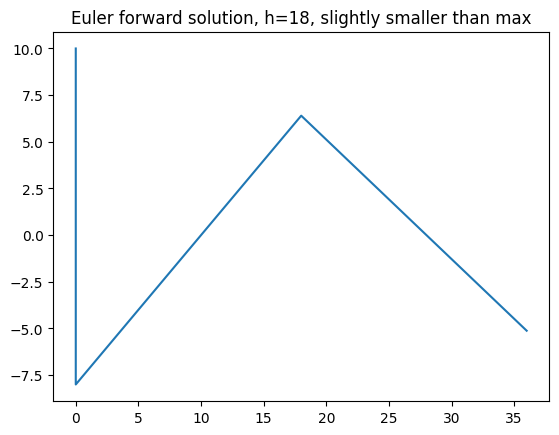

In [3]:
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 22, 60, 10)
plt.plot(x_vals,y_vals)
plt.title("Euler forward solution, h=22, slightly larger than max")
plt.show()
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 18, 60, 10)
plt.plot(x_vals,y_vals)
plt.title("Euler forward solution, h=18, slightly smaller than max")

We can see that a step size slightly smaller than the max produces a nonsensical solution, but it is atleast bounded. Using a step size slightly larger than the max gives divergence, as expected from theory

We will now attempt to find the step size that gives no oscillatory behaviour. 

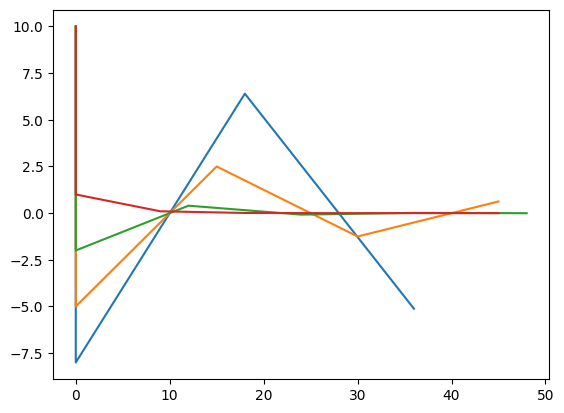

In [4]:
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 18, 60, 10)
plt.plot(x_vals,y_vals)
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 15, 60, 10)
plt.plot(x_vals,y_vals)
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 12, 60, 10)
plt.plot(x_vals,y_vals)
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 9, 60, 10)
plt.plot(x_vals,y_vals)

We got the oscillations to dissapear at a step size of 9. Let us keep going until our plot is similar to the analytic solution

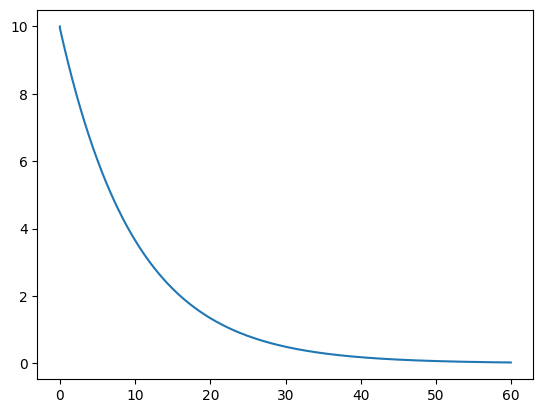

In [5]:
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 1/20, 60, 10)
plt.plot(x_vals,y_vals)

A step size of $\frac{1}{20}$ was sufficient

8. Idk what truncation error is?

11. How long time until the simulation is slow

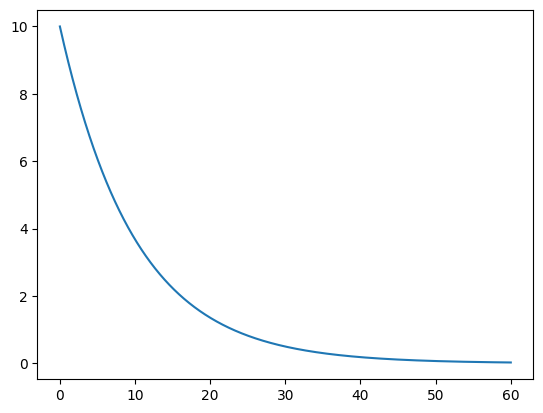

In [6]:
x_vals, y_vals = euler_forward(lambda x : -0.1*x, 1/20000, 60, 10)
plt.plot(x_vals,y_vals)

At a step size of $\frac{1}{20000}$ the code does not insta-print

# Part II - Aphids & Tomatoes

1. The system is non-linear due to the product of $x$ and $y$, which prevents it from being written on the canonical linear form $x'(t) = A(t)x(t)$ where $A(t) : \mathbb{R} \to \mathbb{R}^{n \times n}$  

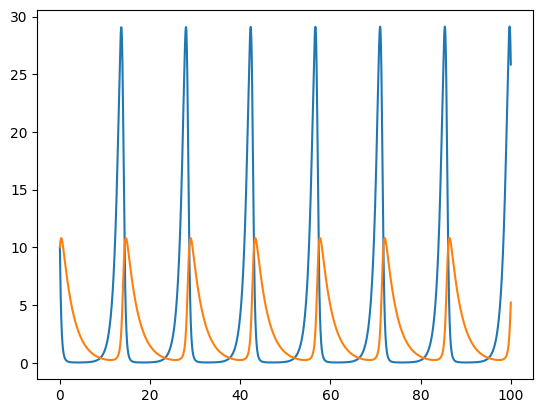

In [7]:
def lotka_volterra_forward_step(xt,yt,h,a,b,c,d):
    xnext = xt + h*(a*xt-b*xt*yt)
    ynext = yt + h*(d*xt*yt - c*yt)
    return xnext, ynext

def lotka_volterra_euler_forward(x0,y0,h,a,b,c,d,tmax):
    x_vals = [x0]
    y_vals = [y0]
    t_vals = [0]
    n_steps = int(tmax/h)
    for i in range(0,n_steps):
        xnext, ynext = lotka_volterra_forward_step(x_vals[i], y_vals[i], h,a,b,c,d)
        x_vals.append(xnext)
        y_vals.append(ynext)
        t_vals.append(h*i)
    return x_vals, y_vals, t_vals

x_vals, y_vals, t_vals = lotka_volterra_euler_forward(10,10,0.0001,1.1,0.4,0.4,0.1,100.0)
plt.plot(t_vals, x_vals)
plt.plot(t_vals, y_vals)
    

We will now apply the lotka-volterra equations to our ladybug/aphid problem

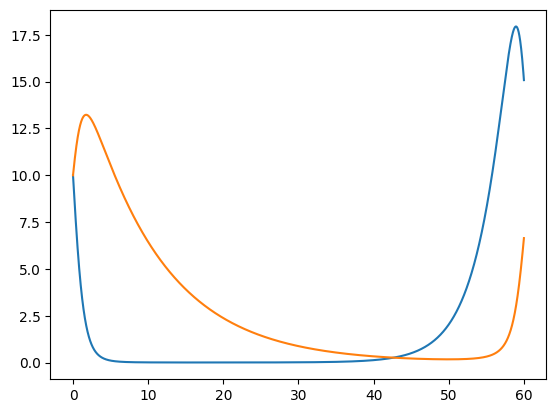

In [8]:

x_vals, y_vals, t_vals = lotka_volterra_euler_forward(10,10,0.0001,0.3,0.1,0.1,0.05,60.0)
plt.plot(t_vals, x_vals)
plt.plot(t_vals, y_vals)

We will now numerically integrate x to find the total amount of tomato leaves. We will use the cumtrapz method

In [9]:
def cumtrapz(x_vals, tmax):
    cumsum = 0
    for x in x_vals:
        cumsum = cumsum + x * (tmax/len(x_vals))
    return cumsum
print("Total tomato leaves: ", cumtrapz(x_vals,60))

Total tomato leaves:  111.8263755360804


In [10]:
def lotka_volterra_total_leaves(x0,y0,h,a,b,c,d,tmax):
    xres, yres, tvals = lotka_volterra_euler_forward(x0,y0,h,a,b,c,d,tmax)
    return cumtrapz(xres, tmax)
print("Total tomato leaves when we start with 11 aphids: ", lotka_volterra_total_leaves(10,11,0.0001,0.3,0.1,0.1,0.05,60.0))
print("Total tomato leaves when with super aphids: ", lotka_volterra_total_leaves(10,10,0.0001,0.3,0.1,0.09,0.05,60.0))
print("Total tomato leaves with better watering: ", lotka_volterra_total_leaves(10,10,0.0001,0.35,0.1,0.1,0.05,60.0))

Total tomato leaves when we start with 11 aphids:  64.2412913785588
Total tomato leaves when with super aphids:  33.02985176121268
Total tomato leaves with better watering:  118.06013657056931
